<a href="https://colab.research.google.com/github/rhodes-byu/cs180-winter25/blob/main/labs/11-mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 11: MLP and Backprop

In this lab, you will create and train a simple deep neural network. You will implement a simple DNN using the scikit-learn MLPClassifier to perform classification on the following weather dataset. Use the 'Rain' feature as the target.

Here is the documentation for the Scikit-Learn MLP Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Install kagglehub if not already installed. Uncomment and run the line below if needed.
#%pip install kagglehub

In [3]:
# Load in data
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zeeshier/weather-forecast-dataset")
print(path)
df = pd.read_csv(f'{path}/weather_forecast_data.csv')
np.random.seed(42)

c:\Users\caleb\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\caleb\.cache\kagglehub\datasets\zeeshier\weather-forecast-dataset\versions\1


In [4]:
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


## Task 1
Perform a simple exploratory analysis on the data (plot the distribution of rain vs. no rain cases, get counts for features/observations, etc.). Then split the data into a train and test set (70% / 30%), using the 'Rain' column as your target. Stratify your split. Apply any required data preparations or transformations.

C:\Users\caleb\AppData\Local\Temp\ipykernel_2732\605728619.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_df["Rain"] = rain_df["Rain"].replace(to_replace=['no rain', 'rain'], value=[0, 1])


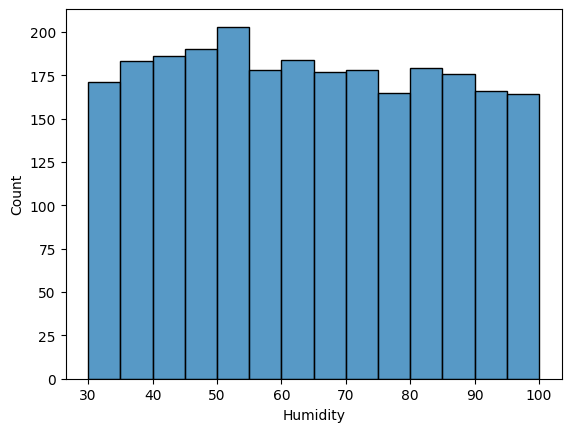

Avg Temp: 22.58172519939987
Avg Wind Speed: 9.9062547597493


<Axes: xlabel='Rain', ylabel='Humidity'>

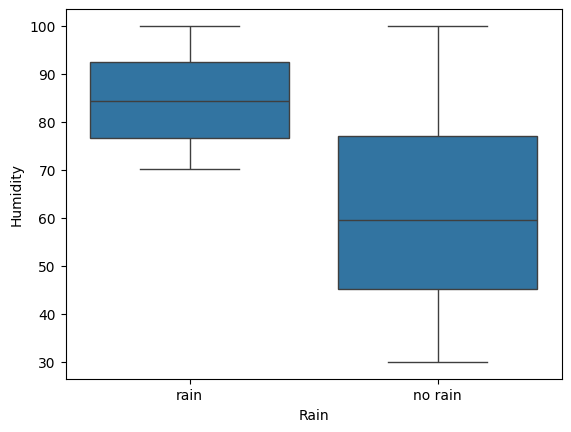

In [5]:
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("future.no_silent_downcasting", True)

rain_df = df[["Rain", "Humidity"]]
rain_df["Rain"] = rain_df["Rain"].replace(to_replace=['no rain', 'rain'], value=[0, 1])
sns.histplot(rain_df, x="Humidity")
plt.show()

avg_temp = df["Temperature"].mean()
print(f"Avg Temp: {avg_temp}")
avg_wind_speed = df["Wind_Speed"]
avg_wind_speed = avg_wind_speed.mean()
print(f"Avg Wind Speed: {avg_wind_speed}")

humidity_and_rain = df[["Humidity", "Rain"]]
sns.boxplot(x="Rain", y="Humidity", data=df)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

df["Rain"] = df["Rain"].replace(['no rain', 'rain'], [0, 1])

X = df.drop("Rain", axis=1)
X = pd.get_dummies(X)
y = df["Rain"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123, stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Suppose you are performing this analysis for a farmer who's work heavily depends on knowing if and when it is going to rain.  Based on your EDA, what metric or metrics would you focus on to evaluate your model?  Why?

We might want to find correlations between things like humidity, wind spee, and temperature and rain, to better predict the weather going forward based on past obsertations.

## Task 2
Your next task is to experiment with various MLP architectures to find an optimal model. This will require playing around with different numbers and sizes of hidden layers, trying different activation functions, and finding other hyperparameters to play around with. Use the metric chosen in Task 1 on your test set as your evaluation metric.

In [7]:
# TODO: Build and fit a simple MLP
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
mlp = MLPClassifier(
    hidden_layer_sizes=(50, 30),   #started with relu
    activation='relu',            
    solver='adam',               
    max_iter=200,                 
    random_state=42
)
y_train = y_train.astype(int)#.squeeze() if data is weird?
y_test = y_test.astype(int)

mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy is: {accuracy}")

# TODO: Test different architectures (adjust the 'hidden_layer_sizes' value)

# TODO: Test different activation functions


Accuracy is: 0.9906666666666667


c:\Users\caleb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


What number of hidden layers worked best for you? What size were they? Why do you think this architecture worked better than others?

Two layers with depth 50 and 30 seemed to work best, there seemed to be diminishing returns past that for both the layer sizes and the max iterations, and I didn't want to overfit the data or make it bad at predicting outside its own training data.

Briefly read into the different activation functions and what makes each one unique. Which one worked best for you? Why do you think that is?

I tried logistic and identiy, and while logistic was close, it still was a little bit worse than relu. I looked into the differences between relu and the other activation functions and it looks like the main advantages are its non-linearity and the reduced change of vanishing gradiants, although I still had a tricky time fully conceptualizing it.

## Task 3
a) Fit a random forest and logistic regression to this same dataset. See how their performance compares to your best MLP. These libaries are already imported. Documentation can be found at the following links.

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [11]:
# TODO: Implement random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
rf = RandomForestClassifier()
param_dist = {'n_estimators': range(50,500,10), 'max_depth': range(1,20)}
rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=5)

rand_search.fit(X_train, y_train)
best_rf = rand_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy is: {accuracy}")


Accuracy is: 0.996


In [12]:
# TODO: Implement logistic regression
from sklearn.linear_model import LogisticRegression
param_dist = {'C': [0.1, 1, 10],'solver': ['liblinear', 'saga'], 'max_iter': [100, 200]}
logreg = LogisticRegression()
rand_search = RandomizedSearchCV(logreg, param_distributions=param_dist, n_iter=3, n_jobs=-1)
rand_search.fit(X_train, y_train)
best_logreg = rand_search.best_estimator_
y_pred = best_logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.9226666666666666


c:\Users\caleb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


b) For each model, determine a measure of variable importance. For the random forest, you can use the feature importances_ attribute. For the logistic regression, you can use the absolute value of the coefficients. For the MLP, you can use permutation importance (see documentation below).

[Permutation Importance](https://scikit-learn.org/stable/modules/permutation_importance.html)

In [ ]:
# TODO: Feature importances here

c) For each set of importances, plot the feature importances using a bar plot, sorted by importance. Include each of the three plots in a single figure with three subplots. (Note: the three sets of scores will be on different scales)

In [ ]:
# TODO: Plot feature importances here

How does the MLP compare to Logistic Regression and Random Forest?

MLP was a little bit better at predicting the liklihood of rain than Logistic Regresssion and Random forest, although it's difficult to tell just how much better it might be since they're already competing for the last ~8 percent accuracy. We'd likely get a better picture of the differences if they were tested on a much more difficult dataset.

Do the feature importances agree between the models? Do the importances intuitively make sense? Explain.

What are the tradeoffs between model complexity and model interpretability?

There's usually a tradeoff betwewen the two, if it's easier for a human to interpret, it's usually less complex, and vice versa. Case in point, MLP is very complex and produces great predictions, but the finished model doesn't make much sense to a person due to the increased complexity.